<a href="https://colab.research.google.com/github/Kushagra2000/Init_3_NLP_Project_round_2/blob/main/init_3_NLP_project_r1_and_r2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload Frakenstein.txt, Moby Dick.txt and test_extract.txt to file system before executing
#Install spacy model for NER
#This cell may take a while to execute
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize #for tokenizing words and sentences
nltk.download('punkt') #Punkt Sentence Tokenizer
nltk.download('stopwords')  # list of stopwords by nltk
nltk.download('averaged_perceptron_tagger') # pos tagger by nltk
import string
from nltk.corpus import stopwords 
from collections import Counter #Counter used for getting frequencies of elements
import re
import pandas as pd
from nltk.probability import FreqDist
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pylab import rcParams
rcParams['figure.figsize'] = 24, 24
frankenstein = 'https://raw.githubusercontent.com/sid-the-ant/init_3_NLP_project_r1/main/Frankenstein.txt'
moby_dick= 'https://raw.githubusercontent.com/sid-the-ant/init_3_NLP_project_r1/main/Moby%20Dick.txt'
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
import seaborn as sns
import en_core_web_lg
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
def pre_process_txt(filename):
    '''Reads the text file to a string and preprocesses the text file
    by lowercasing, removing newlines, punctuation, chapter headers, 
    numbers and ordinal dates and does tokenization. Also removes stopwords'''
    f_s=open(filename)
    book=""
    for line in f_s:
        book+=line
    book=book.replace("\n"," ")
    book=book.lower()
    for char in string.punctuation:
        book=book.replace(char,"")
    remove_chap="[cC]hapter [0-9]+"
    remove_nums="[0-9]+"
    remove_suffixes="(^|\s)+th\s+|(^|\s)+rd\s+|(^|\s)+nd\s+|(^|\s)+st\s+"
    book=re.sub(remove_chap,'',book)
    book=re.sub(remove_nums,'',book)
    book=re.sub(remove_suffixes,' ',book)
    book=book.replace('“',"")
    book=book.replace('”',"")
    book=book.replace('‘',"")
    book=book.replace('’',"")
    book=book.replace('—'," ")
    return book

In [ ]:
def tokenify_rem_stop(book):
    '''Performs tokenization on the preprocessed
    text file and removes stopwords'''
    stop_words=set(stopwords.words('english')) 
    words=word_tokenize(book)
    words=[w for w in words if not w in stop_words]
    return words 

In [ ]:
def tokenify(book):
    '''Performs tokenization on the preprocessed
    text file without removing stopwords'''
    words=word_tokenize(book)
    return words 

In [ ]:
def freq_dist(tokens,ax,st):
    '''Plots a frequency distribution of the tokens
    in the form of a bar graph'''
    count=Counter(tokens)
    for_graph=Counter(tokens).most_common(30)
    graph_dict={}
    for i in for_graph:
        graph_dict[i[0]]=i[1]
        
    
    ax.bar(graph_dict.keys(),graph_dict.values())
    ax.set_ylabel("Frequency of Words", fontsize=10)
    ax.set_title("Frequency of 30 most occuring words "+st, fontsize=20)
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    print("Number of unique tokens "+st+":",len(count))
    return count
    

In [ ]:
def word_cloud(counts,axes,st):
    '''Makes a word cloud from the given text'''
    wordcloud=WordCloud(width=1000,height=800).fit_words(counts)
    axes.axis('off')
    axes.set_title(st,fontsize=20)
    axes.imshow(wordcloud)
    
    

In [ ]:
def do_all(txt):
    '''Does preprocessing, tokenization, word cloud formation and plots frequency
    distribution of top 30 most common words for a given text file'''
    fig,axes=plt.subplots(ncols=2,nrows=2)
    book1=pre_process_txt(txt)
    tb_1=tokenify(book1)
    c1_a=freq_dist(tb_1,axes[0,0],"with stopwords")
    word_cloud(c1_a,axes[0,1],"Stopwords Included")
    tbs_1=tokenify_rem_stop(book1)
    c1_b=freq_dist(tbs_1,axes[1,0],"without stopwords")
    word_cloud(c1_b,axes[1,1],"Stopwords Excluded")

Number of unique tokens with stopwords: 7357
Number of unique tokens without stopwords: 7228


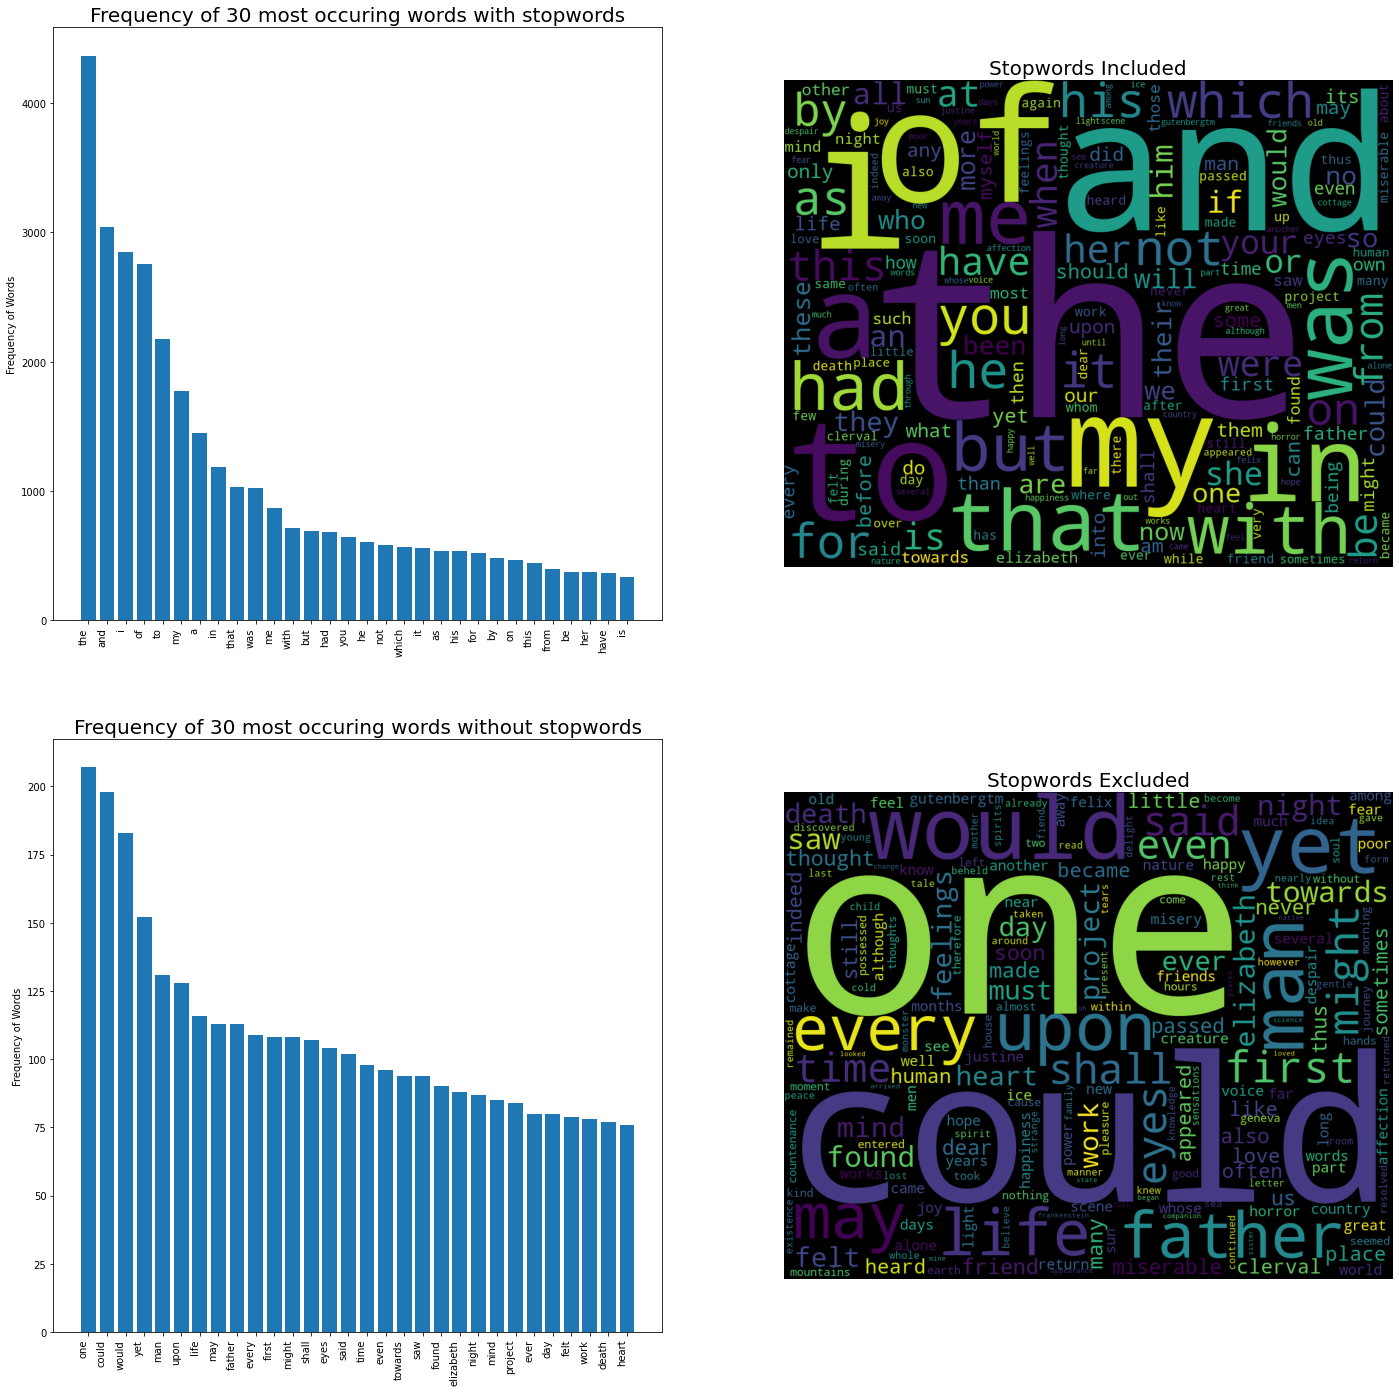

In [ ]:
rcParams['figure.figsize'] = 24, 24
do_all('Frankenstein.txt')

Number of unique tokens with stopwords: 6967
Number of unique tokens without stopwords: 6840


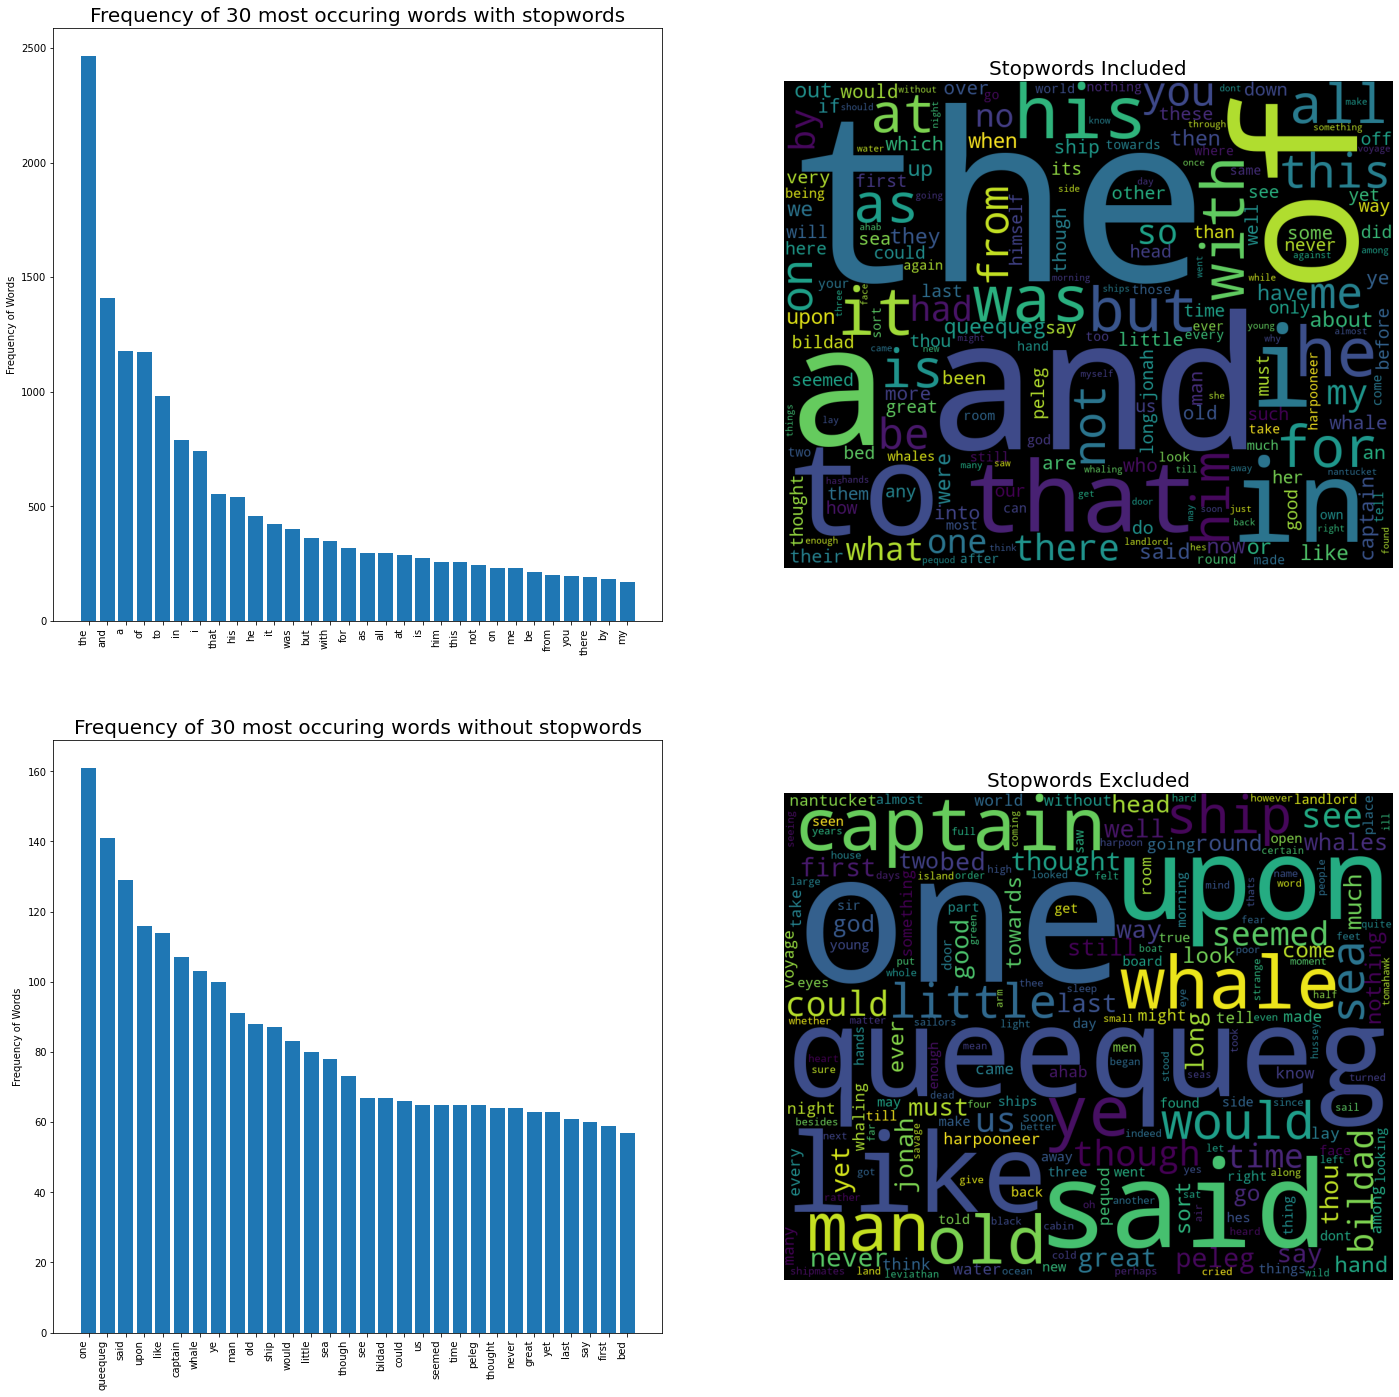

In [ ]:
rcParams['figure.figsize'] = 24, 24
do_all("Moby Dick.txt")

In [ ]:
def POS_tagging(txt):
    '''Does POS tagging using Penn TreeBank corpus after removing table of 
    contents and page numbers and chapter numbers from the text'''
    f_in=open(txt)
    book=""
    for line in f_in:
        book+=line
    
    remove_let ="[lL]etter [0-9]+"
    remove_chap="[cC]hapter [0-9]+"
    remove_nums="[0-9]+"
    book = re.sub(remove_let,'',book)
    book=re.sub(remove_chap,'',book)
    book=re.sub(remove_nums,'',book)
    
    tokenized = sent_tokenize(book)
    concat_lists = []
    for w in tokenized:
        words = nltk.word_tokenize(w)
        tagged = nltk.pos_tag(words)
        concat_lists += tagged

    tags = [w[1] for w in concat_lists if w[1].isalpha()]
    
    return tags

In [ ]:
def dist_of_tags(tags):
    '''This function counts frequency of different POS tags and plots 
    frequency distribution of tags'''
    tagCounter = Counter(tags)
    fig, ax = plt.subplots(figsize=(20, 10))
    
    tags = tagCounter.keys()
    count = tagCounter.values()
    
    ax.bar(tags,count,color = 'green')
    ax.set_title("Frequency of various tags",fontsize = 20)
    ax.set_ylabel("Number of occurence",fontsize = 20)
    ax.set_xlabel("Tags",fontsize = 20)

In [ ]:
def tag_n_analyse(txt):
    '''This function does POS tagging and analyse distribution of 
    various tags in the text'''
    tags = POS_tagging(txt)
    dist_of_tags(tags)

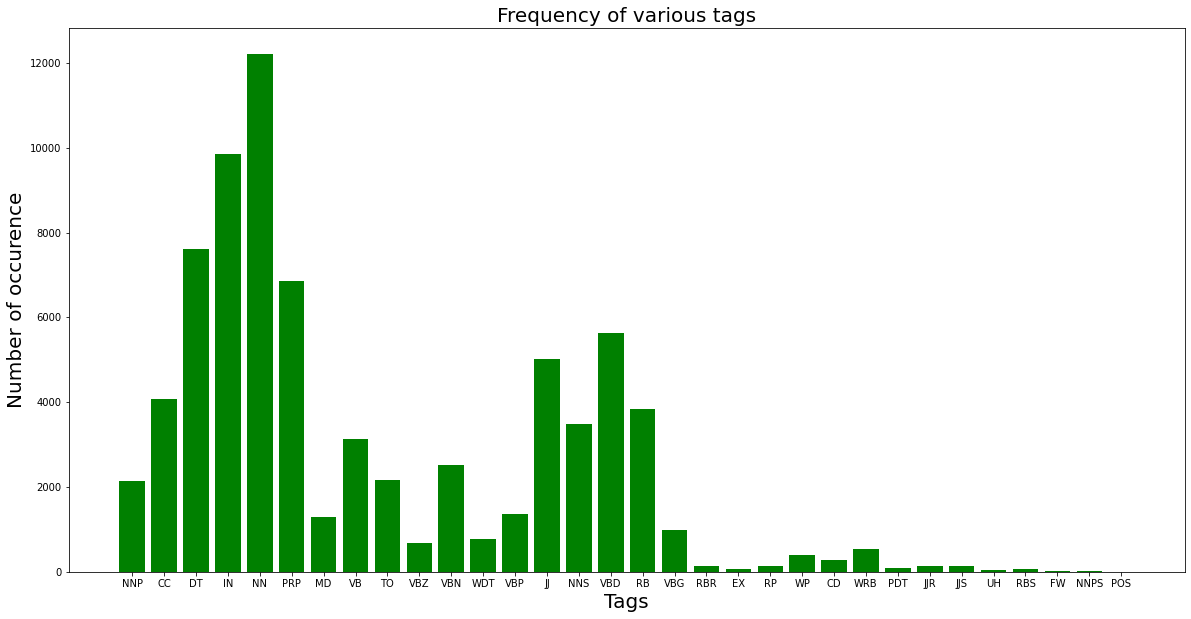

In [ ]:
 tag_n_analyse("Frankenstein.txt")

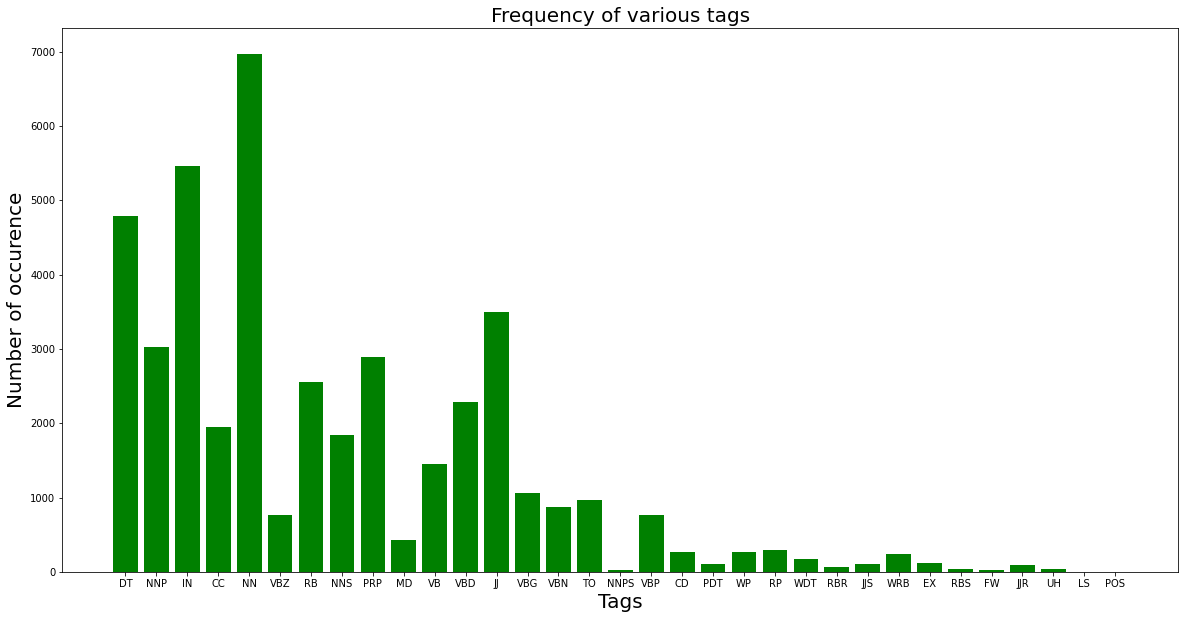

In [ ]:
 tag_n_analyse("Moby Dick.txt")

In [ ]:
# Round 2
# First Part begins here
def Noun_Verb_Category(txt):
    '''This function does word sense disambiguation and
    stores the category of wordnet to which it belongs'''
    f_in=open(txt)
    book=""
    for line in f_in:
        book+=line
    
    remove_let ="[lL]etter [0-9]+"
    remove_chap="[cC]hapter [0-9]+"
    remove_nums="[0-9]+"
    book=re.sub(remove_let,'',book)
    book=re.sub(remove_chap,'',book)
    book=re.sub(remove_nums,'',book)
    
    tokenized = sent_tokenize(book)
    noun_list = []
    verb_list = []
    for w in tokenized:
        words = nltk.word_tokenize(w)
        tagged = nltk.pos_tag(words)
        for tag in tagged:
            if tag[1][0] == 'N':
                lex = lesk(words,tag[0],'n')
                if lex:
                    noun_list.append(lex.lexname())
            elif tag[1][0] == 'V':
                lex = lesk(words,tag[0],'v')
                if lex:
                    verb_list.append(lex.lexname())

    return noun_list, verb_list

In [ ]:
def plot_Category(txt):
    '''This function plots frequency of each category
    of noun and verb'''
    noun_list,verb_list = Noun_Verb_Category(txt)
    count_n=Counter(noun_list)
    count_v=Counter(verb_list)
    
    df_n=pd.DataFrame.from_dict(count_n,orient='index')
    ax_n=df_n.plot(kind='bar',title='Distribution of Noun types')
    ax_n.set_xlabel("Noun types")
    ax_n.set_ylabel("Count")
    plt.show()
    print("\n")
    df_v=pd.DataFrame.from_dict(count_v,orient='index')
    ax_v=df_v.plot(kind='bar',title='Distribution of Verb Types')
    ax_v.set_xlabel("Verb types")
    ax_v.set_ylabel("Count")
    plt.show()

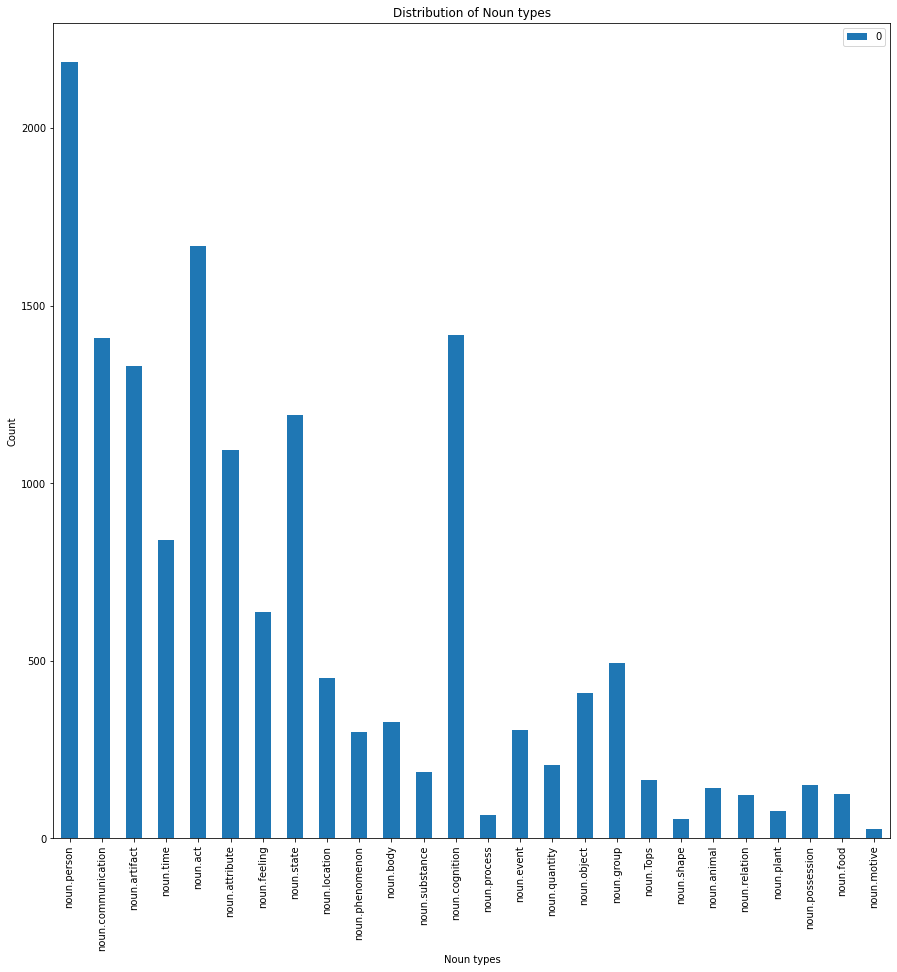

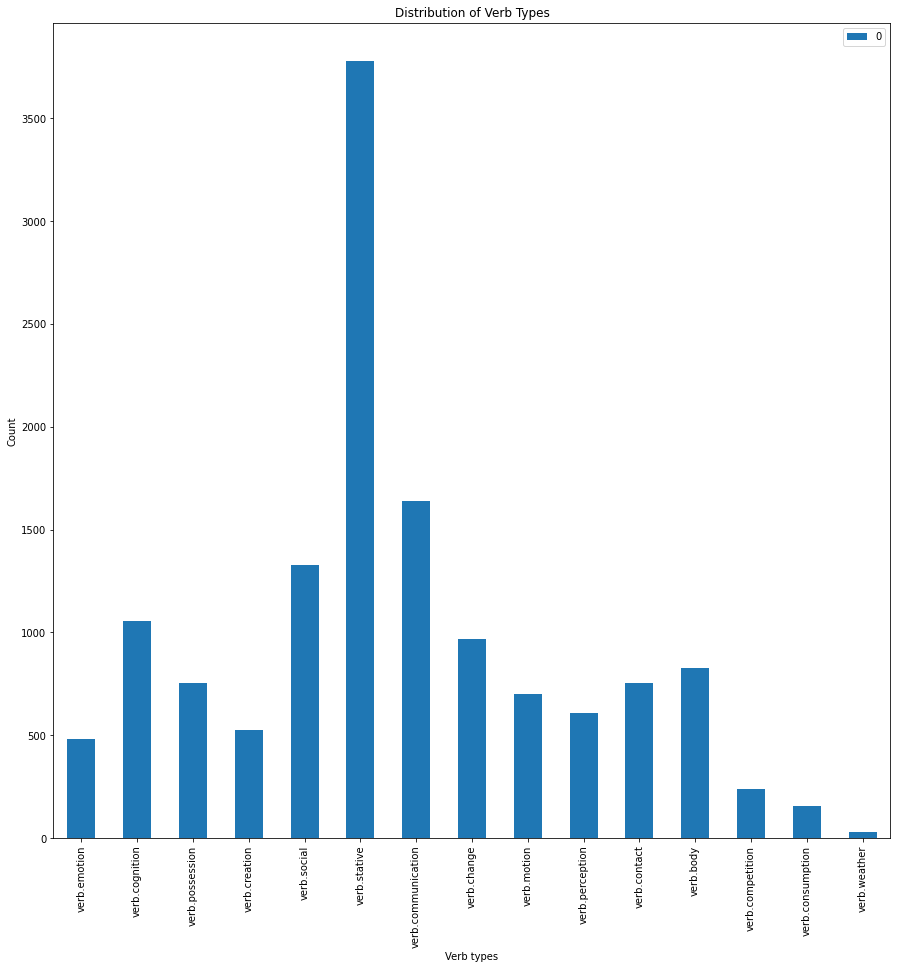

In [ ]:
#Noun and Verb Distribution of Frankenstein
rcParams['figure.figsize'] = 15, 15
plot_Category("Frankenstein.txt")

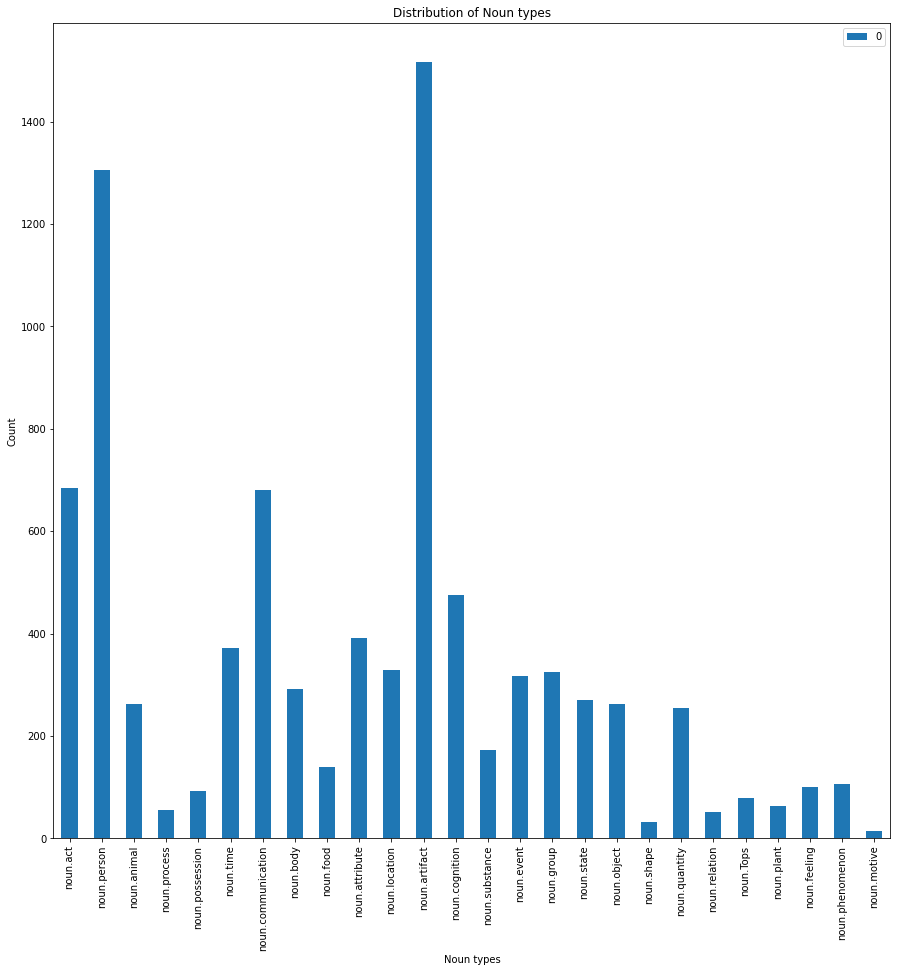

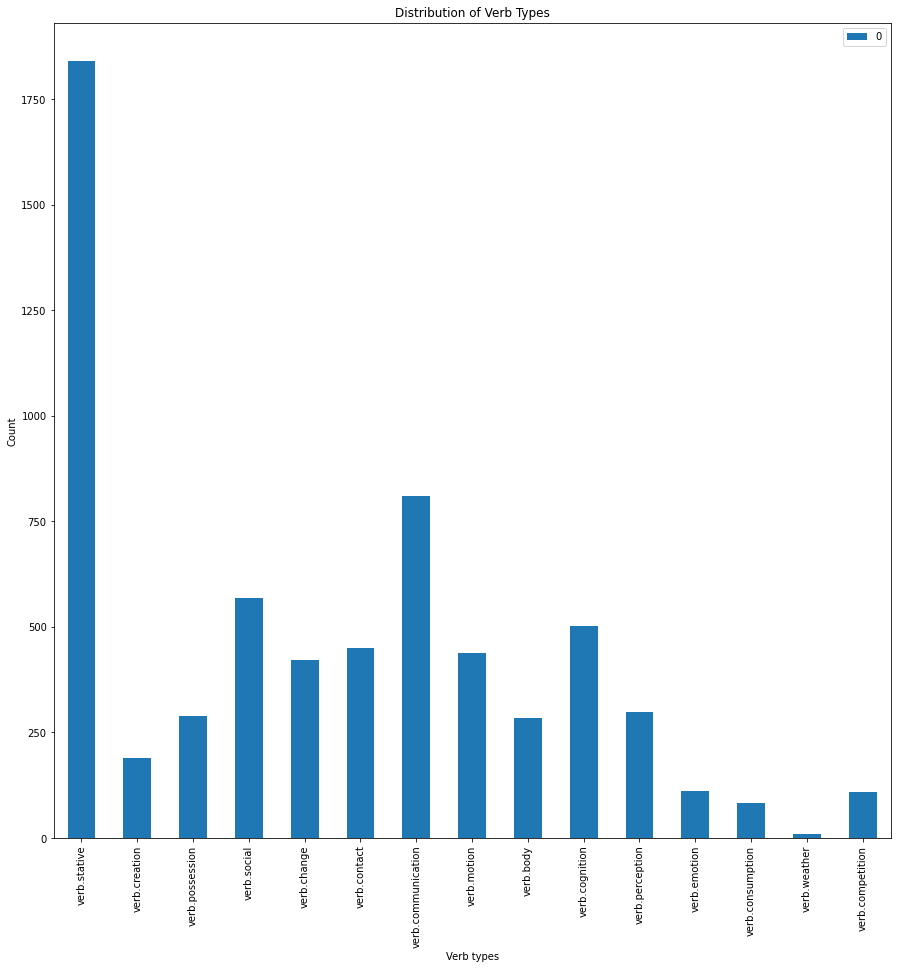

In [ ]:
#Noun and Verb Distribution of Moby Dick
rcParams['figure.figsize'] = 15, 15
plot_Category("Moby Dick.txt")

In [ ]:
#Second Part begins here

mdl=en_core_web_lg.load()

In [ ]:
def ner_preprocess(filename):
    '''Used to preprocess the file for 
    Named entity recognition and performs named entity recognition
    Returns a dataset consisting of entity name and entity type'''
    f_s=open(filename)
    remove_chap="[cC]hapter [0-9]+"
    book=""
    for line in f_s:
        book+=line
    book=book.replace("\n"," ")
    book=book.replace('“','"')
    book=book.replace('”','"')
    book=book.replace('—'," ")
    book=book.replace('_'," ")
    book=re.sub(remove_chap,'',book)
    book = re.sub(' +',' ',book)  #For handling multiple spaces
    lis=sent_tokenize(book)
    ent_name=[]
    ent_type=[]
    for sent in lis:
      labl=mdl(sent)
      #print(labl)
      for e in labl.ents:
        #print(e,"\t",e.label_)
        if e.label_=='ORG' or e.label_=='PERSON' or e.label_=='LOC' or e.label_=='GPE' or e.label_=='NORP' or e.label_=='FAC':
              ent_name.append(e.text)
              if(e.label_ not in ['ORG','PERSON','LOC']):
                if(e.label_ == 'NORP'):
                  ent_type.append('ORG')
                elif e.label_=='GPE' or e.label_=='FAC':
                  ent_type.append('LOC')
              else:
                ent_type.append(e.label_)

    lis=list(zip(ent_name,ent_type))
    return pd.DataFrame(lis,columns=['Entity_Name','Entity_Type'])

In [ ]:
#Entity dataset for Frankenstein 
frank_ent=ner_preprocess('Frankenstein.txt')
print("Size of entity dataset:",frank_ent.shape)
frank_ent

Size of entity dataset: (1058, 2)


,Entity_Name,Entity_Type
0,Frankenstein,PERSON
1,Mary Wollstonecraft,PERSON
2,Godwin,PERSON
3,Shelley CONTENTS Letter,ORG
4,Saville,PERSON
...,...,...
1053,Gutenberg-tm,PERSON
1054,Gutenberg-tm,PERSON
1055,U.S.,LOC
1056,Gutenberg-tm,PERSON


In [ ]:
#Entity Dataset for Moby Dick 
moby_ent=ner_preprocess('Moby Dick.txt')
print("Size of entity dataset:",moby_ent.shape)
moby_ent

Size of entity dataset: (1293, 2)


,Entity_Name,Entity_Type
0,Moby Dick,PERSON
1,Whale,ORG
2,Herman Melville,PERSON
3,Moby Dick,PERSON
4,Whale,ORG
...,...,...
1288,thou chap,PERSON
1289,Scotch-cap,ORG
1290,thou green,ORG
1291,Bildad,PERSON


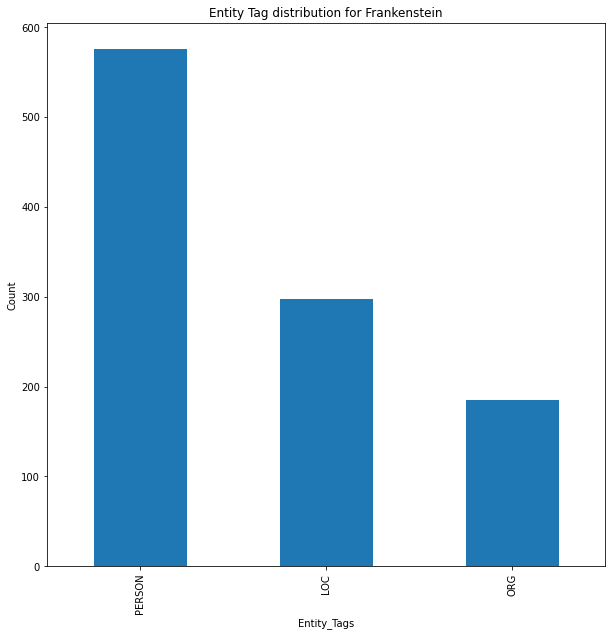

In [ ]:
#Distribution of Entity tags of Frankenstein
ax_f=frank_ent['Entity_Type'].value_counts().plot(kind='bar',figsize=(10,10),title='Entity Tag distribution for Frankenstein')
ax_f.set_xlabel('Entity_Tags')
ax_f.set_ylabel('Count')
plt.show()

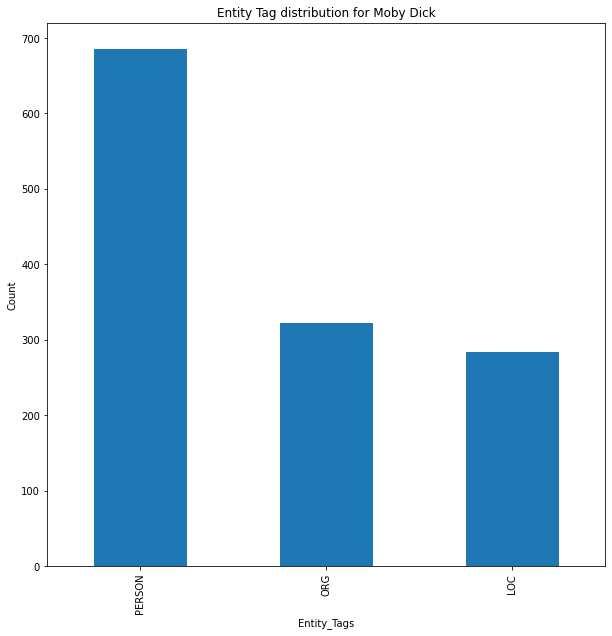

In [ ]:
#Distribution of Entity tags of Moby Dick
ax_m=moby_ent['Entity_Type'].value_counts().plot(kind='bar',figsize=(10,10),title='Entity Tag distribution for Moby Dick')
ax_m.set_xlabel('Entity_Tags')
ax_m.set_ylabel('Count')
plt.show()


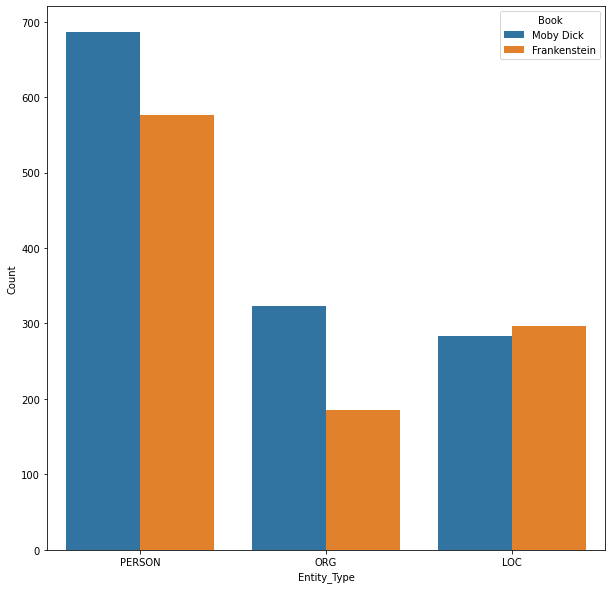

In [ ]:
#Comparison of Distribution of Entity labels in both books

m_counts=moby_ent['Entity_Type'].value_counts().to_frame()
m_counts['Book']='Moby Dick'
m_counts=m_counts.reset_index()
m_counts.columns=['Entity_Type','Count','Book']

f_counts=frank_ent['Entity_Type'].value_counts().to_frame()
f_counts['Book']='Frankenstein'
f_counts=f_counts.reset_index()
f_counts.columns=['Entity_Type','Count','Book']

comb=pd.concat([m_counts,f_counts])
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Entity_Type',y='Count',data=comb,hue='Book',ax=ax)
plt.show()

In [ ]:
#Evaluation of NER
test_pred=ner_preprocess('test_extract.txt')
test_pred

,Entity_Name,Entity_Type
0,Peleg,PERSON
1,Bildad,PERSON
2,Pequod,LOC
3,thou wantest,PERSON
4,thou tellest ye do,PERSON
5,ye,PERSON
6,Ahab,PERSON
7,Bildad,LOC
8,Peleg,LOC
9,Peleg,ORG


In [ ]:
#Removing 5 incorrect entries
test_pred=test_pred[test_pred.Entity_Name != 'ye']
test_pred=test_pred[test_pred.Entity_Name != 'schiavi ognor frementi']
test_pred=test_pred[test_pred.Entity_Name != 'thou wantest']
test_pred=test_pred[test_pred.Entity_Name != 'thou tellest ye do']


In [ ]:
test_pred


,Entity_Name,Entity_Type
0,Peleg,PERSON
1,Bildad,PERSON
2,Pequod,LOC
6,Ahab,PERSON
7,Bildad,LOC
8,Peleg,LOC
9,Peleg,ORG
10,Peleg,ORG
11,Bildad,PERSON
13,Bildad,PERSON


In [ ]:
#using manually labelled entities from test_extract.txt to make a dataset for testing accuracy

lab_dict=[
    ['Captain Peleg','PERSON'],
    ['Captain Bildad','PERSON'],
    ['Pequod','LOC'],
    ['Captain Ahab','PERSON'],
    ['Bildad','PERSON'],
    ['Peleg','PERSON'],
    ['Peleg','PERSON'],
    ['Peleg','PERSON'],
    ['Bildad','PERSON'],
    ['Bildad','PERSON'],
    ['Ishmael','PERSON'],
    ['Ishmael','PERSON'],
    ['Pequod','LOC'],
    ['Yojo','PERSON'],
    ['Queequeg','PERSON'],
    ['Cape','LOC'],
    ['Presbyterian Christians','ORG'],
    ['pagans','ORG'],
    ['Queequeg','PERSON'],
    ['Yojo','PERSON'],
    ['Queequeg','PERSON'],
    ['Presbyterian Christians','ORG'],
    ['Pagans','ORG'],
    ['Nathan Swain','PERSON'],
    ['Cape of Blanco','LOC'],
    ['Swiss','ORG'],
    ['Henry Clerval','PERSON'],
    ['Frankenstein','PERSON'],
    ['Clerval','PERSON'],
    ['Elizabeth','PERSON'],
    ['Clerval','PERSON'],
    ['Ingolstadt','LOC'],
    ['Dutch','ORG'],
    ['Vicar of Wakefield','PERSON'],
    ['Greek','ORG'],
    ['Greek','ORG'],
    ['Milanese','ORG'],
    ['German','ORG'],
    ['Italians','ORG'],
    ['Italy','LOC'],
    ['Austria','LOC'],
    ['Belrive','LOC'],
    ['Jura','LOC'],
    ['Mr. Kirwin','PERSON'],
    ['Orkney Islands','LOC']
]

true_lab=pd.DataFrame(lab_dict,columns=['Entity_Name','Entity_Type'])
true_lab

,Entity_Name,Entity_Type
0,Captain Peleg,PERSON
1,Captain Bildad,PERSON
2,Pequod,LOC
3,Captain Ahab,PERSON
4,Bildad,PERSON
5,Peleg,PERSON
6,Peleg,PERSON
7,Peleg,PERSON
8,Bildad,PERSON
9,Bildad,PERSON


In [ ]:
#F1 score and confusion matrix for denoting accuracy of Named entity recognition
print(classification_report(true_lab['Entity_Type'],test_pred['Entity_Type']))
print('Confusion Matrix: \n',confusion_matrix(true_lab['Entity_Type'],test_pred['Entity_Type']))

              precision    recall  f1-score   support

         LOC       0.83      1.00      0.91        10
         ORG       0.79      1.00      0.88        11
      PERSON       1.00      0.79      0.88        24

    accuracy                           0.89        45
   macro avg       0.87      0.93      0.89        45
weighted avg       0.91      0.89      0.89        45

Confusion Matrix: 
 [[10  0  0]
 [ 0 11  0]
 [ 2  3 19]]


In [ ]:
#Third Part begins here

def ne_rel(filename):
  '''Used to preprocess the file for Named entity relationship and detects relationship
  between PERSON entities.'''

  f_s=open(filename)
  remove_chap="[cC]hapter [0-9]+"
  book=""
  for line in f_s:
      book+=line
  book=book.replace("\n"," ")
  book=book.replace('“','"')
  book=book.replace('”','"')
  book=book.replace('—'," ")
  book=book.replace('_'," ")
  book=re.sub(remove_chap,'',book)
  book = re.sub(' +',' ',book)  #For handling multiple spaces
  ent_name=[]
  ent_start=[]
  ent_end=[]
  sent_list=sent_tokenize(book)

  labl=mdl(book)
  for e in labl.ents:
    #print(e,"\t",e.label_)
    if e.label_=='PERSON' and 'ye' not in str(e.text) and 'thou' not in str(e.text) and 'Thou' not in str(e.text):
      ent_name.append(e.text)
      ent_start.append(e.start_char)
      ent_end.append(e.end_char)


  lis=list(zip(ent_name,ent_start,ent_end))
  lis.sort(key=lambda x:x[1])
  #print(lis)
  pat_list=[r'.*\b[Ff]riend\b.*',r'.*\b[Bb]rother\b.*',r'.*\b[Ff]ather\b.*',r'.*\b[Ss]ister\b.*',r'.*\b[Mm]other\b.*',r'.*\b[Cc]ousin\b.*',r'.*\b[Uu]ncle\b.*',r'.*\b[Ww]ife\b.*',r'.*\b[Hh]usband\b.*',r'.*\b[Aa]unt\b.*']
  type_list=["Friend",'Brother','Father','Sister','Mother','Cousin','Uncle','Wife','Husband','Aunt']
  rel_list=list(zip(pat_list,type_list))
  #print(rel_list)
  for i,tup1 in enumerate(lis[:-1]):
    tup2=lis[i+1]
    if tup2[1]-tup1[2]<=100 and str(tup1[0])!=str(tup2[0]):

      sel_text=book[tup1[1]:tup2[2]+1]
      #print(sel_text)
      for rel in rel_list:
        reg="\\b"+tup1[0]+"\\b"+rel[0]+"\\b"+tup2[0]+"\\b"
        if re.match(reg,sel_text):
          print(rel[1]+" REL between",tup1[0],"and",tup2[0]+":")
          print(sel_text)
          print("\n")
          pass
        

In [ ]:
#Testing algorithm on a small file
ne_rel('myfile.txt')  #file contains the sentence "Tom is the brother of Bradley "

Brother REL between Tom and Bradley:
Tom is the brother of Bradley 




In [ ]:
ne_rel('Frankenstein.txt')

Father REL between Clerval and Elizabeth:
Clerval; his presence brought back to my thoughts my father, Elizabeth,


Cousin REL between Elizabeth and Henry:
Elizabeth: "My dearest Cousin, "You have been ill, very ill, and even the constant letters of dear kind Henry 


Mother REL between Madame Moritz and Justine:
Madame Moritz, her mother, was a widow with four children, of whom Justine 


Aunt REL between M. Moritz and Justine:
M. Moritz, treated her very ill. My aunt observed this, and when Justine 


Sister REL between Esq and Manon:
Esq. Her ugly sister, Manon,


Brother REL between Ernest and William:
Ernest came, and enquired if we had seen his brother; he said, that he had been playing with him, that William 


Cousin REL between Elizabeth and Justine:
Elizabeth, weeping bitterly. My cousin wept also. "Oh, Justine!


Friend REL between Safie and Felix:
Safie, unable to attend to her friend, rushed out of the cottage. Felix 


Father REL between Elizabeth and Clerval:
Elizabeth, 

In [ ]:
ne_rel('Moby Dick.txt')

Brother REL between Samuel Comstock and William Comstock:
Samuel Comstock ( the mutineer ), by his brother, William Comstock.


Friend REL between A Bosom and Queequeg:
A Bosom Friend. Returning to the Spouter-Inn from the Chapel, I found Queequeg 


Father REL between Queequeg and Grace:
Queequeg’s father. Grace 


Father REL between Deuteronomy and Mapple:
Deuteronomy why Father Mapple 


Friend REL between Bildad and Starbuck:
Bildad, "but away with thee, friend Starbuck,


